In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib
import os

file_name = "../data/synthetic_covid_dataset.csv"

if not os.path.exists(file_name):
    raise FileNotFoundError("File not found.Please check")

df = pd.read_csv(file_name)
df.dropna()

X = df.drop("COVID_Positive",axis=1)
y = df["COVID_Positive"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaler_file = "../models/covid_scaler.pkl"

if os.path.exists(scaler_file):
    raise FileExistsError("File already exist.")
else:
    joblib.dump(scaler,scaler_file)

pd.DataFrame(df)

,Age,Fever,Cough,Fatigue,Loss_of_Smell,Breathing_Difficulty,Travel_History,Contact_with_COVID_Patient,Comorbidity_Diabetes,Comorbidity_Heart Disease,Comorbidity_Hypertension,Comorbidity_None,COVID_Positive
0,63,0,1,1,0,1,0,0,1,0,0,0,1
1,36,1,0,1,0,0,0,0,0,0,0,1,0
2,63,1,1,1,0,0,0,0,0,0,0,1,1
3,22,1,0,1,0,0,0,0,1,0,0,0,0
4,42,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,73,0,1,0,1,1,0,0,0,0,0,1,1
9996,48,1,1,0,0,0,1,0,0,1,0,0,1
9997,65,1,1,1,0,0,0,0,0,0,0,1,1
9998,28,1,0,0,0,1,0,0,0,0,1,0,1


In [2]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model = GaussianNB()
model.fit(X_train,y_train)

file_name_pkl = "../models/covid_model.pkl"

if os.path.exists(file_name_pkl):
    raise FileExistsError("File already exist")
else:
    joblib.dump(model,file_name_pkl)
    print("File created successfully")


File created successfully


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pred = model.predict(X_test)

accuracy = accuracy_score(y_test,pred)
classification = classification_report(y_test,pred)

print("accuracy",accuracy)
print("classification",classification)


accuracy 0.755
classification               precision    recall  f1-score   support

           0       0.58      1.00      0.73       670
           1       1.00      0.63      0.77      1330

    accuracy                           0.76      2000
   macro avg       0.79      0.82      0.75      2000
weighted avg       0.86      0.76      0.76      2000



Confusion Matrix:
 [[670   0]
 [490 840]]


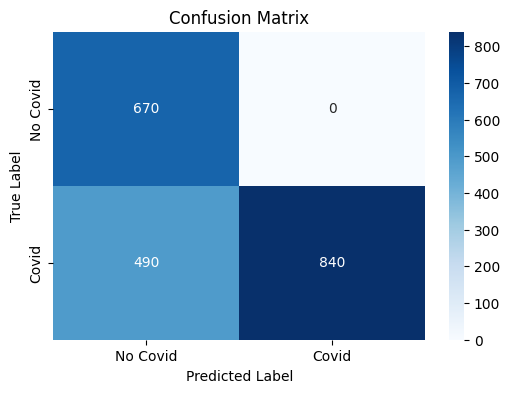

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns 

cm = confusion_matrix(y_test,pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Covid", "Covid"], yticklabels=["No Covid", "Covid"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

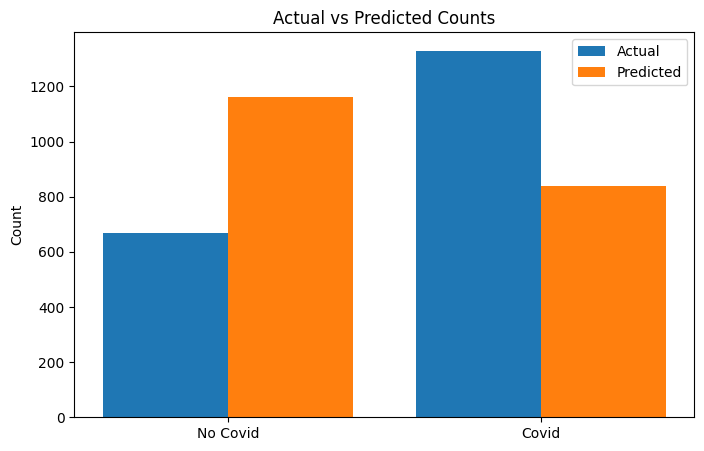

In [42]:
from collections import Counter
import numpy as np

count_pred = Counter(pred)
count_actual = Counter(y_test)

labels = ["No Covid", "Covid"]
x = np.arange(len(labels))

actual = [count_actual[0], count_actual[1]]
pred = [count_pred[0], count_pred[1]]

plt.figure(figsize=(8,5))
plt.bar(x - 0.2, actual, width=0.4, label='Actual')
plt.bar(x + 0.2, pred, width=0.4, label='Predicted')
plt.xticks(x, labels)
plt.ylabel("Count")
plt.title("Actual vs Predicted Counts")
plt.legend()
plt.show()